In [2]:
import imageio
import numpy as np
from scripts.canny import Canny
import matplotlib.pyplot as plt

In [3]:
img = imageio.imread('images/7.jpg')

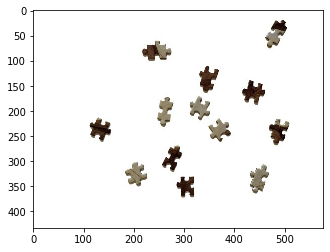

In [4]:
plt.imshow(img)

In [5]:
def image_segmentation(image, threshold):
    #todos os pixels recebem 0 inicialmente.
    mask = np.zeros(image.shape)
    #se pixel >= threshold em image, atribui ele como 255.
    mask[image>=threshold] = 255
    #retorna a máscara gerada pela segmentação.
    return mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


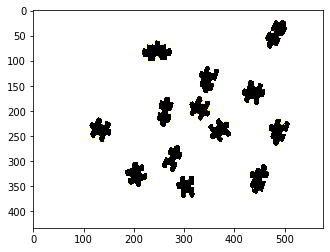

In [6]:
img_aux = image_segmentation(img, 240)
plt.imshow(img_aux)

In [7]:
import cv2
median_blur= cv2.medianBlur(img_aux, 3)
cv2.imshow('median_blur', median_blur)  

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/median_blur.simd.hpp:975: error: (-210:Unsupported format or combination of formats)  in function 'medianBlur'


In [62]:
def rgb2gray(img_rgb):
    return np.floor(np.dot(img_rgb[...,:3], [0.299, 0.587, 0.114]))

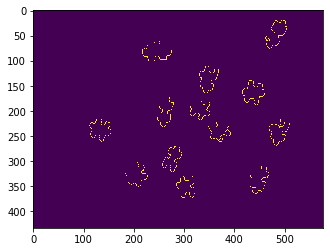

In [63]:
canny = Canny(rgb2gray(img), sigma=2, kernel_size=3, lowthreshold=.1, highthreshold=.55, weak_pixel=10)
img_transform = canny.detect()
plt.imshow(img_transform)